# Exercise - Classification of Survived Passengers on Titanic Dataset

The 'titanic-train.csv' contains data of passenger details aboard the titanic, and whether they survived or not. We have to make a model which will predict their survival. The features are as follows:  

Survived - Survival (0 = No; 1 = Yes)  
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
Name - Name  
Sex - Sex  
Age - Age  
SibSp - Number of Siblings/Spouses Aboard  
Parch - Number of Parents/Children Aboard  
Ticket - Ticket Number  
Fare - Passenger Fare (British pound)  
Cabin - Cabin  
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

## Solve the following questions:
1. Based on logical reasoning, decide which variables are absolutely not required or relevant to the model. List them down and drop those columns. 
2. Plot a bar chart of the survived column. 
3. Plot a bar chart of the number of females who survived and not, and similarly males who survived and not. 
4. **BONUS(0.3%)** Plot a stacked bar chart of survived or not based on PClass(i.e how many survived and not for 1st, 2nd and 3rd class). The graph can be made by referring to https://matplotlib.org/examples/pylab_examples/bar_stacked.html
5. Check if there are missing values in any columns. Remove such rows in the dataset.  
6. Convert categorical values (if any) to numbers in the dataset.
7. Plot a heatmap of the correlation between all columns. There are columns are inter-related. Which are those colums? Can you drop either one of the inter-related column before proceeding ahead?
8. Now split your dataset into training & testing dataset with 80:20 ratio using train_test_split function. Use a random state which will give an approximately equal number of survived and non survived rows in the training test. Validate using a bar chart on the training dataset. 

## Decision Tree Modelling
#### Use a decision tree classifier with a minimum depth of 6, to train your model. Obtain the decision tree & confusion matrix for the predictions. Obtain the score of the model.

## Perceptron Modelling
#### Use a perceptron model with a max_iter value 400, to train your model. Obtain the confusion matrix for the predictions. Obtain the score of the model. 

## Which of the two models fairs better? 


### BONUS(0.5%)
There is a relation between age and PClass. Can you fill in the missing values of age with this information instead of dropping the rows entirely? You will have to justify with some data analysis and visulization.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
titanic = pd.read_csv("titanic-train.csv")
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#titanic=titanic.dropna()
#titanic.head()

In [5]:
titanic=titanic.drop(['Cabin','Ticket','Fare','Name','PassengerId'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [6]:
titanic.shape

(891, 7)

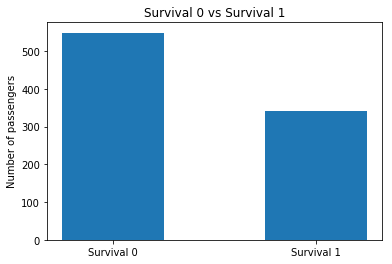

In [7]:
sur0=titanic[titanic['Survived']==0]
sur1=titanic[titanic['Survived']==1]
objects=['Survival 0','Survival 1']
x_coordinates = np.arange(len(objects))
accidents=[len(sur0['Survived']),len(sur1["Survived"])]
plt.bar(x_coordinates, accidents, align='center', width=0.5)
plt.xticks(x_coordinates, objects)
plt.ylabel('Number of passengers')
plt.title('Survival 0 vs Survival 1')
plt.show()

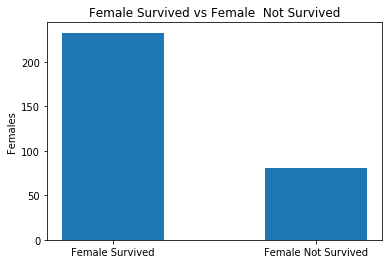

In [8]:
titanic_female_survived = len(sur1[sur1["Sex"]=='female'])
titanic_female_notsurvived= len(sur0[sur0["Sex"]=='female'])

objects = ['Female Survived', 'Female Not Survived']
accidents = [titanic_female_survived , titanic_female_notsurvived]
x_coordinates = np.arange(len(objects))

plt.bar(x_coordinates, accidents, align='center', width=0.5)
plt.xticks(x_coordinates, objects)
plt.ylabel('Females')
plt.title('Female Survived vs Female  Not Survived')
plt.show()

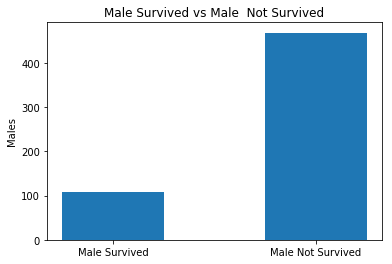

In [9]:
titanic_male_survived = len(sur1[sur1["Sex"]=='male'])
titanic_male_notsurvived= len(sur0[sur0["Sex"]=='male'])

objects = ['Male Survived', 'Male Not Survived']
accidents = [titanic_male_survived , titanic_male_notsurvived]
x_coordinates = np.arange(len(objects))

plt.bar(x_coordinates, accidents, align='center', width=0.5)
plt.xticks(x_coordinates, objects)
plt.ylabel('Males')
plt.title('Male Survived vs Male  Not Survived')
plt.show()

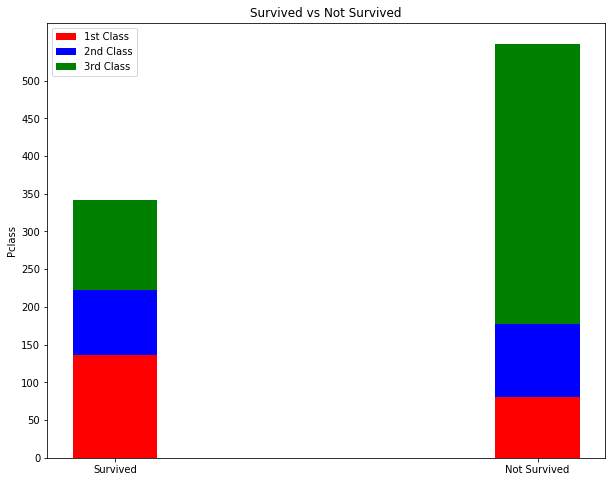

In [10]:
class1_notsurvived=sur0[sur0["Pclass"]==1]
class2_notsurvived=sur0[sur0["Pclass"]==2]
class3_notsurvived=sur0[sur0["Pclass"]==3]

class1_survived=sur1[sur1["Pclass"]==1]
class2_survived=sur1[sur1["Pclass"]==2]
class3_survived=sur1[sur1["Pclass"]==3]
objects=['Survived','Not Survived']
x_coordinates = np.arange(len(objects))
accident1=[len(class1_survived),len(class1_notsurvived)]
accident2=[len(class2_survived),len(class2_notsurvived)]
accident3=[len(class3_survived),len(class3_notsurvived)]
x=np.array(accident1)
y=np.array(accident2)
accident4=x+y

plt.figure(figsize=(10,8))
p1=plt.bar(x_coordinates,accident1,width=0.2,color='r',label="1st Class")
p2=plt.bar(x_coordinates,accident2,width=0.2,color='b',bottom=accident1,label="2nd Class")
p3=plt.bar(x_coordinates,accident3,width=0.2,color='g',bottom=accident4,label="3rd Class")

plt.xticks(x_coordinates, objects)
plt.yticks(np.arange(0, 550, 50))
plt.ylabel('Pclass')
plt.title('Survived vs Not Survived')
plt.legend()
plt.show()

In [11]:
titanic[(titanic['Survived']==0)]['Pclass'].value_counts().sort_index()

1     80
2     97
3    372
Name: Pclass, dtype: int64

In [12]:
titanic[(titanic['Survived']==1)]['Pclass'].value_counts().sort_index()

1    136
2     87
3    119
Name: Pclass, dtype: int64

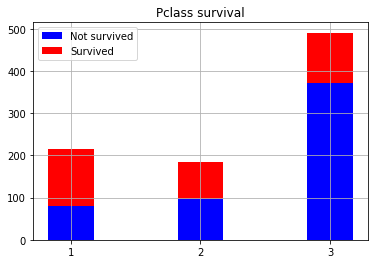

In [13]:
N = 3
not_survived = (80,97,372)
survived = (136,87,119)

ind = np.arange(N)    
width = 0.35      

p1 = plt.bar(ind, not_survived, width, color='b')
p2 = plt.bar(ind, survived, width,color='r',bottom=not_survived)

plt.title('Pclass survival')
plt.xticks(ind, ('1','2','3'))
plt.legend((p1[0], p2[0]), ('Not survived', 'Survived'))
plt.grid()
plt.show()

In [14]:
data=titanic
titanic=titanic.dropna()
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [15]:
pd.set_option('mode.chained_assignment', None)
dict1={"male":0,"female":1}
titanic['Sex']=titanic['Sex'].apply(lambda x:dict1[x])

dict2={'C':0, 'Q':1, 'S':2}
titanic['Embarked']=titanic["Embarked"].apply(lambda x:dict2[x])

In [16]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,2
1,1,1,1,38.0,1,0,0
2,1,3,1,26.0,0,0,2
3,1,1,1,35.0,1,0,2
4,0,3,0,35.0,0,0,2


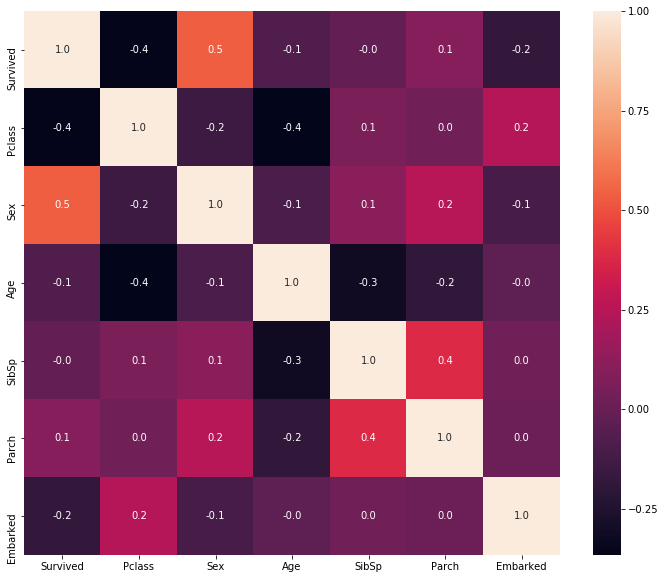

In [17]:
import seaborn as sb
plt.figure(figsize=(12,10))
sb.heatmap(titanic.corr(),annot=True,fmt='.1f')

In [18]:
from sklearn.model_selection import train_test_split
x=titanic[['Pclass','Age','Sex','Embarked']]
y=titanic["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2500)

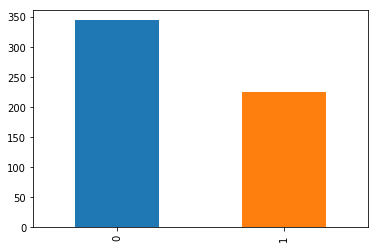

In [19]:
y_train.value_counts().plot.bar()

In [20]:
y_train.value_counts()

0    344
1    225
Name: Survived, dtype: int64

In [21]:
from sklearn.tree import DecisionTreeClassifier
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=6)
obtained_tree=decisiontree.fit(x_train,y_train)

print("Extracted Classes",decisiontree.classes_)

Extracted Classes [0 1]


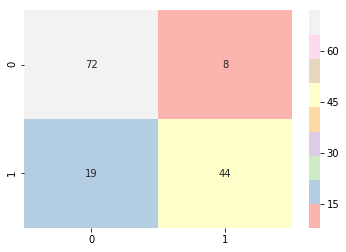

In [22]:
import seaborn
from sklearn.metrics import classification_report, confusion_matrix
Predicted_Species=obtained_tree.predict(x_test)
seaborn.heatmap(confusion_matrix(y_test,Predicted_Species),annot=True,cmap="Pastel1",xticklabels=decisiontree.classes_,yticklabels=decisiontree.classes_)

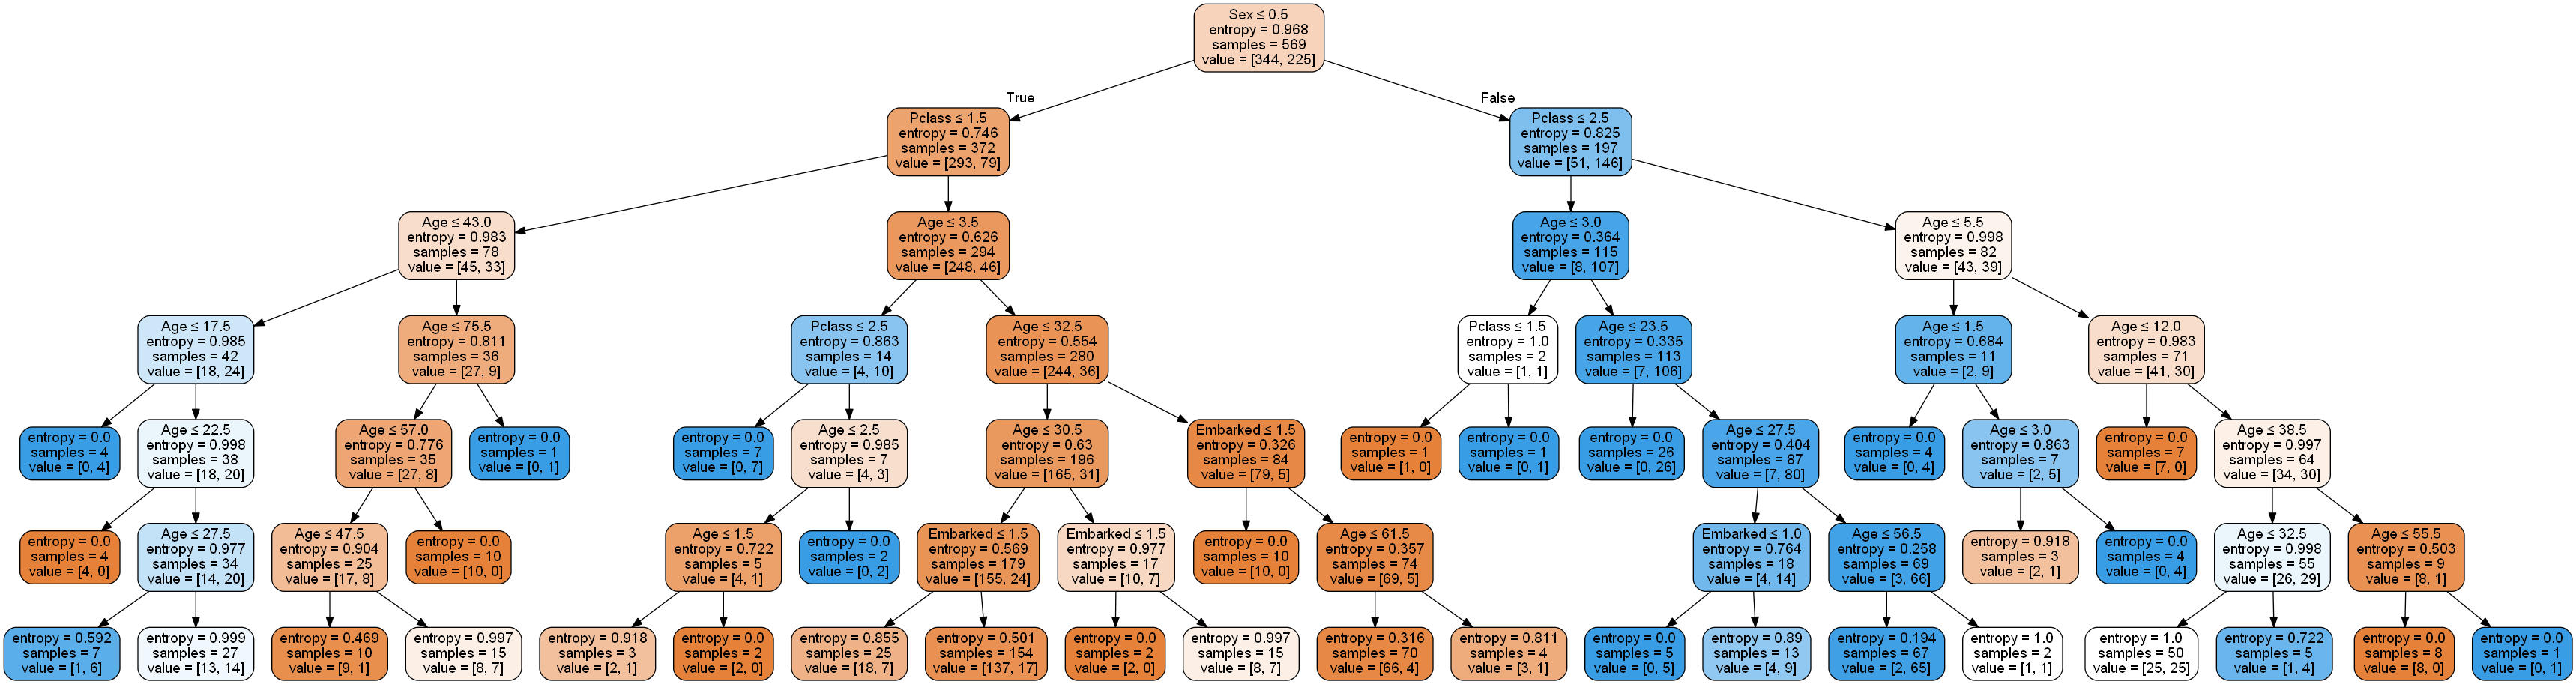

In [23]:
from io import StringIO
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'
from sklearn.tree import export_graphviz #import software
import pydotplus # convert into dot file
from IPython.display import Image # to display image in ouput from dot file

DecisionTreeImg=StringIO() # creates file in memory(RAM)

export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,
                feature_names=['Pclass','Age','Sex','Embarked'],special_characters=True)# creates a dot file
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

In [24]:
decisiontree.score(x_test,y_test)

0.8111888111888111

In [25]:
from sklearn.linear_model import Perceptron

classifier= Perceptron(max_iter=400)
model= classifier.fit(x_train,y_train)
pred=model.predict(x_test)
print("Expected Values:",y_test.tolist())
print("Predicted Values:",pred)

Expected Values: [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
Predicted Values: [1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1
 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1]


In [26]:
from sklearn import metrics
con=metrics.confusion_matrix(y_test,pred)
print(con)

[[56 24]
 [ 7 56]]


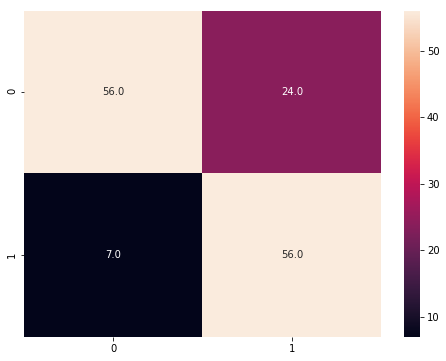

In [27]:
plt.figure(figsize=(8,6))
sb.heatmap(con,annot=True,fmt='.1f')

In [28]:
model.score(x_test,y_test)

0.7832167832167832

## Decision tree model fairs better than Perceptron model

In [29]:
data=data.fillna(-1,axis=1) #method='bfill'
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


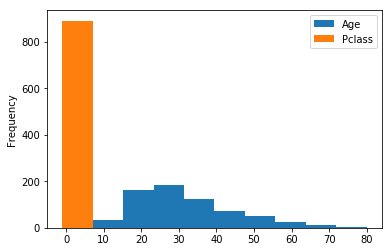

In [30]:
data[['Age','Pclass']].plot(kind='hist')

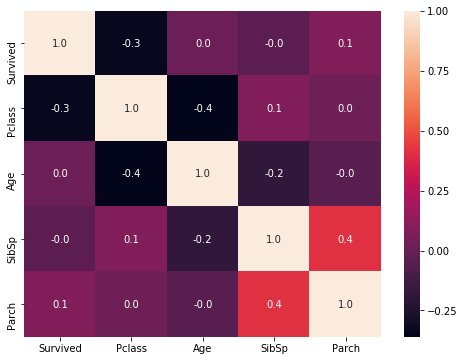

In [31]:
plt.figure(figsize=(8,6))
sb.heatmap(data.corr(),annot=True,fmt='.1f')

In [32]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder().fit_transform(data[(data['Age']!=-1)]['Age'])

dectree=DecisionTreeClassifier(criterion='entropy',max_depth=6)
pre_tree=dectree.fit(data[(data['Age']!=-1)]['Pclass'].values.reshape(-1,1),label_encoder)

In [33]:
pred=pre_tree.predict(data[(data['Age']==-1)]['Pclass'].values.reshape(-1,1))

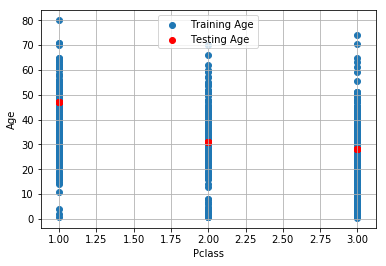

In [34]:
plt.grid()
plt.scatter(data[(data['Age']!=-1)]['Pclass'],data[(data['Age']!=-1)]['Age'],label='Training Age')
plt.scatter(data[(data['Age']==-1)]['Pclass'],pred,color='red',marker='o',label='Testing Age')
plt.legend()
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()